# GOLD PRICE PREDICTION

In [1]:
!pip install yfinance

In [2]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install scikit-learn

In [14]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 3.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 3.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 3.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.0 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 4.3 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.1 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 3.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.6 MB/s eta 0:00:00
   -----------------------

In [17]:
!pip install seaborn

## Libraries

In [8]:
import yfinance as yf

In [9]:
import pandas as pd


In [11]:
import numpy as np


In [15]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [18]:
import seaborn as sns

In [19]:
import gradio as gr #for data scientist you not need to build forentend using this we can copy the code and import in it 
#build the interface

In [20]:
from sklearn.model_selection import RandomizedSearchCV

## Data Collection

In [21]:
usd_inr=yf.download('USDINR=X', start='2024-01-01', end='2024-12-31', interval='1wk')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [22]:
type(usd_inr)

pandas.core.frame.DataFrame

In [24]:
usd_inr.head()

Price,Close,High,Low,Open,Volume
Ticker,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
Date,,,,,
2024-01-01,83.240601,83.360298,83.035004,83.248596,0
2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2024-01-15,83.160599,83.230797,82.809998,82.872101,0
2024-01-22,83.146103,83.222504,81.513702,83.124702,0
2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [25]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2024-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDINR=X)   53 non-null     float64
 1   (High, USDINR=X)    53 non-null     float64
 2   (Low, USDINR=X)     53 non-null     float64
 3   (Open, USDINR=X)    53 non-null     float64
 4   (Volume, USDINR=X)  53 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [26]:
usd_inr.reset_index(inplace=True)

In [27]:
#keep only wanted column
usd_inr=usd_inr[['Date','Close']]
usd_inr.columns=['Date', 'USD_INR']

In [28]:
usd_inr.head()

,Date,USD_INR
0,2024-01-01,83.240601
1,2024-01-08,83.076103
2,2024-01-15,83.160599
3,2024-01-22,83.146103
4,2024-01-29,82.927597


In [29]:
gold_data_inr= yf.download('XAU', start='2024-01-01', end='2024-12-31', interval='1wk')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['XAU']: YFPricesMissingError('possibly delisted; no price data found  (1wk 2024-01-01 -> 2024-12-31)')


 due to above error e cant continue n this yffinance so we move into exchange-rates.org for further process 

in exchange -rates.org we have two option to implement one is convert data int excel form and using pandas we can use that or else import that website by using web scraping beacuse it is sensitive data so we can't access  here i going to use manually excel format


In [32]:
gold_dataset = pd.read_csv("GOLDUSD.csv") 


In [33]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


## Data Analysis

In [36]:
gold_dataset.head() #this is after removing the  rupees symbol 

,Date,USD_INR,Goldrate
0,01-01-2024,83.240601,5066.31
1,08-01-2024,83.076103,4966.31
2,15-01-2024,83.160599,5015.33
3,22-01-2024,83.146103,4950.84
4,29-01-2024,82.927597,4976.77


In [35]:
gold_dataset['Goldrate'] = gold_dataset['Goldrate'].replace('₹', '', regex=True).replace(',','', regex=True).astype(float) #this help to remove the rupees sybol and , 

## EDA

In [37]:
# EDA helps to remove the outliers, cleaning the dataset like missing values, null values, normalization and standardisation

<Axes: ylabel='USD_INR'>

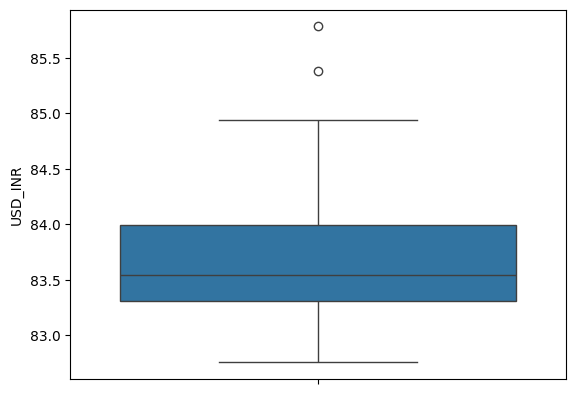

In [38]:
sns.boxplot(gold_dataset['USD_INR']) #it show outliers but a we have minimum dataset so i not going to remove the outliers

In [39]:
gold_dataset['USD_INR'].min() #seeing a minimum value in the USD_INR column data like we can see Goldrate column min and max value 

np.float64(82.75229645)

<Axes: xlabel='USD_INR', ylabel='Goldrate'>

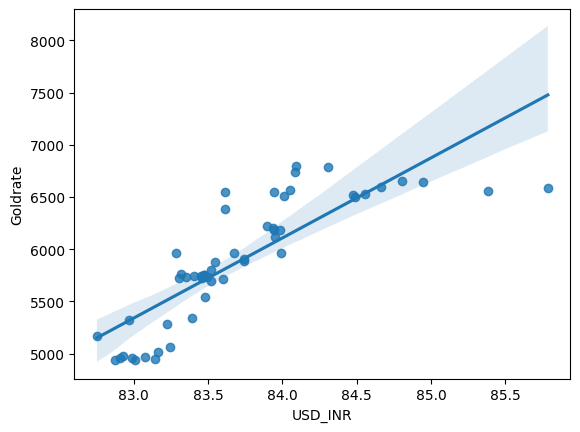

In [40]:
sns.regplot(x='USD_INR', y='Goldrate', data=gold_dataset)

## Model Training

In [52]:
X = gold_dataset[['USD_INR']]
y = gold_dataset[['Goldrate']]

In [53]:
y

,Goldrate
0,5066.31
1,4966.31
2,5015.33
3,4950.84
4,4976.77
5,4953.90
6,4938.73
7,4934.99
8,4960.54
9,5167.64


In [54]:
X

,USD_INR
0,83.240601
1,83.076103
2,83.160599
3,83.146103
4,82.927597
5,82.985298
6,83.009598
7,82.872299
8,82.910400
9,82.752296


<Axes: ylabel='Goldrate'>

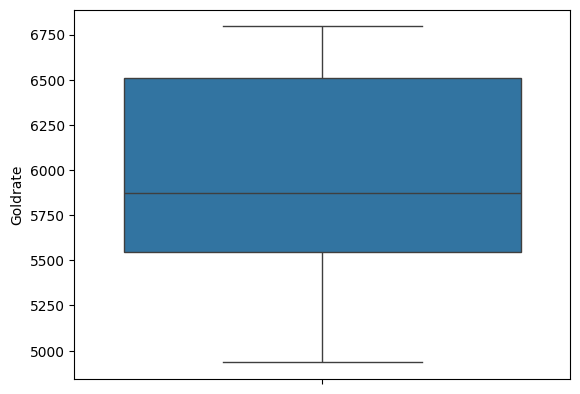

In [50]:
sns.boxplot(gold_dataset['Goldrate']) # Goldrate has no outliers  i am checking this in addition


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=42)

In [97]:
X_train.shape, X_test.shape

((26, 1), (27, 1))

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


In [157]:
X_test_scale

array([[ 0.20512693],
       [ 0.40541595],
       [ 0.5780807 ],
       [ 0.17867026],
       [ 0.41835108],
       [ 0.03877398],
       [ 0.18323591],
       [ 0.71121751],
       [ 0.09395183],
       [ 0.36921538],
       [ 0.20776841],
       [ 0.01307388],
       [ 0.21312205],
       [ 0.04711205],
       [ 0.35096064],
       [ 0.01897467],
       [ 0.25474432],
       [ 0.25024936],
       [ 0.49208996],
       [ 0.36657129],
       [ 0.66214988],
       [ 0.23082703],
       [-0.04117722],
       [ 0.14737829],
       [ 0.29907614],
       [ 0.36458167],
       [ 0.19853763]])

## Model Building

In [158]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [159]:
regressor.fit(X_train_scale, y_train) # to find coeff,intercept

LinearRegression()

In [160]:
regressor.get_params() #default values see in sklearn 
#ennala parameters use pannirukunu paaka
#copyX=true used to copy the data into separate if you need to use in later for work, if you work with large dataset set as false because it run fastelse if run slow
#n_jobs used in python refer it
#positive helps it predict only by the positive value

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [161]:
regressor.coef_


array([[1845.44414273]])

In [162]:
regressor.intercept_

array([5353.60369676])

In [163]:
# y = mx+b
m = regressor.coef_[0][0]
b = regressor.intercept_[0]


In [164]:
m,b

(np.float64(1845.4441427283853), np.float64(5353.603696762229))

In [165]:
x_train_predict = regressor.predict(X_train_scale)
#training data again check pannura crt ta irukanu paakuren 

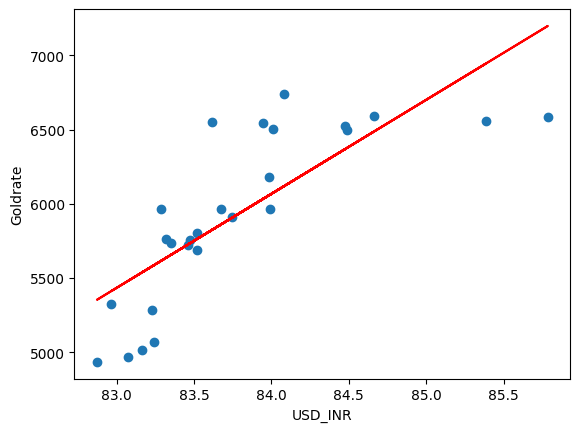

In [166]:
plt.scatter(X_train,y_train)
plt.plot(X_train, x_train_predict, color='r')
plt.xlabel("USD_INR")
plt.ylabel("Goldrate")

plt.show()

In [167]:
X_test_predicted = regressor.predict(X_test_scale)

In [168]:
X_test_predicted 

array([[5732.15398757],
       [6101.7761834 ],
       [6420.41934019],
       [5683.32967293],
       [6125.64724539],
       [5425.15890983],
       [5691.75532541],
       [6666.11588961],
       [5526.98654727],
       [6034.97006346],
       [5737.02868973],
       [5377.73081477],
       [5746.9085347 ],
       [5440.54634643],
       [6001.28196101],
       [5388.62038899],
       [5823.72011499],
       [5815.42490948],
       [6261.72823229],
       [6030.09052969],
       [6575.56432304],
       [5779.58208262],
       [5277.61343217],
       [5625.58209493],
       [5905.53200014],
       [6026.41880194],
       [5719.99380915]])

In [169]:
y_test


,Goldrate
19,5754.39
41,6563.33
47,6524.06
12,5341.21
43,6795.35
5,4953.90
17,5744.34
50,6639.21
3,4950.84
32,6114.39


In [170]:
from sklearn.metrics import mean_squared_error

In [171]:
mean_squared_error(y_test, X_test_predicted)

101031.00092938282

## Hyperparameter Optimization

In [172]:
from sklearn.model_selection import RandomizedSearchCV
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}
## we only create a param_space because its parameter in linar regression we give either true or false

In [173]:
search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)
# we pack in randamizedSearchCV => param_space(we create in above one), n_iter(no of iteration), cv(cross-validation ku how many polls needed) 

In [174]:
search.fit(X_train_scale, y_train) #pass the data

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [175]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [176]:
tuned_model = LinearRegression(positive= True, n_jobs= 1, fit_intercept= True, copy_X= True)
#create a model as tuned_model

In [177]:
tuned_model.fit(X_train_scale, y_train)

LinearRegression(n_jobs=1, positive=True)

In [178]:
tuned_model.coef_

array([[1845.44414273]])

In [179]:
tuned_model.intercept_

array([5353.60369676])

## MLOPS

In [180]:
# Save the model
# Build interface
#connect model and interface

In [181]:
import pickle 
# it helps to convert the serialization(serialization seen in python) to byte code then save the file

In [182]:
pickle.dump(regressor, open('regressor.pkl', 'wb')) # pickle.dump is a method and call as pkl
# if regressor file is not present then new va create panni itha  file la irukura tha la write pannidu athuvum binary ah!

In [183]:
regressor_reloaded=pickle.load(open('regressor.pkl','rb'))

In [184]:
regressor_reloaded.coef_

array([[1845.44414273]])

In [185]:
pickle.dump(scaler, open('scaler.pkl','wb'))
#if you need to process the input you should need to scaler that (standarization)

In [186]:
def calculate_gold_rate(usd_inr):
    scale_input=scaler.transform(np.array(usd_inr).reshape(1,-1))
    return regressor.predict(scale_input)[0][0].round(2)
    #print(scale_input)

In [187]:
calculate_gold_rate(80)

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(3534.76)

In [188]:
import gradio as gr

demo = gr.Interface(
    fn=calculate_gold_rate,
    inputs=["number"],
    outputs=["number"],
    title='How much is 1g gold rate'
)

demo.launch()
#75 and avove na tha positive kaatuthu below value kudutha negative values varauthu check why 

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [195]:
y_pred = regressor.predict(X_test)
y_pred = np.maximum(y_pred, 0) 

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X doe